<a href="https://colab.research.google.com/github/youssef-gis/Digit_Recognition_using_Cnn/blob/main/digit_recognition_using_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Data preprocessing

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

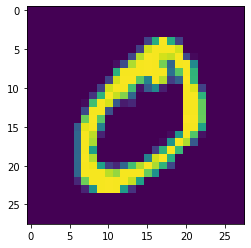

In [ ]:
plt.imshow(X_train[1])

In [ ]:
y_train[1]

0

In [ ]:
(X_train.min(), X_train.max()),(y_train.min(), y_train.max())

((0, 255), (0, 9))

In [ ]:
(X_test.min(), X_test.max()),(y_train.min(), y_train.max())

((0, 255), (0, 9))

In [ ]:
X_train = X_train/255.0

In [ ]:
X_test = X_test/255.0

In [ ]:
(X_train.min(), X_train.max())

(0.0, 1.0)

In [ ]:
(X_test.min(), X_test.max())

(0.0, 1.0)

In [ ]:
#reshape the images in three dimension
X_train = X_train.reshape(60000, 28, 28, 1)

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
X_test = X_test.reshape(10000, 28, 28, 1)

In [ ]:
X_test.shape

(10000, 28, 28, 1)

In [ ]:
input_shape = X_train[0].shape

In [ ]:
input_shape

(28, 28, 1)

# Building the model

In [ ]:
model = tf.keras.models.Sequential()

In [ ]:
#Adding the first Conv Layer
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape= input_shape))

In [ ]:
#Adding the second Conv Layer
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

In [ ]:
#Adding the max pooling Layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2) ))

In [ ]:
#Adding a dropout Layer
model.add(tf.keras.layers.Dropout(0.4))

In [ ]:
#Adding a Flatten Layer
model.add(tf.keras.layers.Flatten())

In [ ]:
# Adding a dense Layer
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [ ]:
#Adding an output Layer
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [ ]:
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics = ['sparse_categorical_accuracy'])

# Train  and evaluate the model

In [ ]:
history = model.fit(X_train, y_train, batch_size= 128, epochs=3, validation_data = (X_test, y_test))

Epoch 1/3
469/469 [==============================] - 145s 309ms/step - loss: 0.0520 - sparse_categorical_accuracy: 0.9836 - val_loss: 0.0370 - val_sparse_categorical_accuracy: 0.9873
Epoch 2/3
469/469 [==============================] - 147s 314ms/step - loss: 0.0349 - sparse_categorical_accuracy: 0.9888 - val_loss: 0.0339 - val_sparse_categorical_accuracy: 0.9879
Epoch 3/3
469/469 [==============================] - 144s 307ms/step - loss: 0.0272 - sparse_categorical_accuracy: 0.9911 - val_loss: 0.0318 - val_sparse_categorical_accuracy: 0.9887


In [ ]:
#model predict
y_pred = model.predict(X_test)

In [ ]:
y_pred_classes  = np.argmax(y_pred, axis=1)

In [ ]:
y_pred_classes[15], y_test[15]

(5, 5)

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_classes)
print(cm)

[[ 977    0    0    0    0    0    2    1    0    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   1    7 1009    1    1    0    4    4    5    0]
 [   0    0    1 1003    0    2    0    2    2    0]
 [   0    0    0    0  972    0    5    0    0    5]
 [   0    0    0    3    0  886    2    0    1    0]
 [   6    3    0    0    1    1  945    0    2    0]
 [   0    2    3    1    0    0    0 1020    1    1]
 [   3    2    0    0    0    1    1    1  965    1]
 [   1    3    1    3    7    3    0    8    8  975]]


In [ ]:
accuracy_cm = accuracy_score(y_test, y_pred_classes)

In [ ]:
accuracy_cm

0.9887

In [ ]:
#Plot Learning curve
def plot_Curve(history, epoch):
  epoch_range = range(1, epoch+1)

  #training vs validation accuracy
  plt.plot(epoch_range, history.history['sparse_categorical_accuracy'])
  plt.plot(epoch_range, history.history['val_sparse_categorical_accuracy'])
  plt.title('Model accuracy')
  plt.xlabel('epoch')
  plt.ylabel('Accuracy')
  plt.legend(['train', 'validation'], loc="upper left")
  plt.show()

  #training vs validation loss
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.xlabel('epoch')
  plt.ylabel('Loss')
  plt.legend(['train', 'validation'], loc="upper left")
  plt.show()  


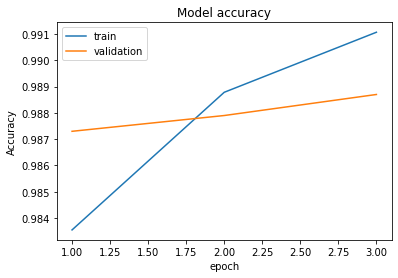

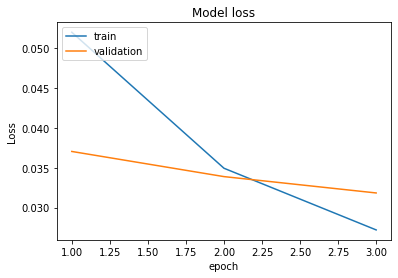

In [ ]:
plot_Curve(history, 3)